In [3]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
# plt.style.use('seaborn-pastel')

# Homework

0) Finish the implementation of false positon method. Use it to find the solution for $\sin(x) + 1 = x$ do it 20 times.

1.9345632107482833 5.071942865697565e-12


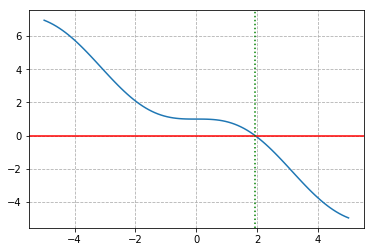

In [4]:
def f(x): return math.sin(x) + 1 - x

def FPM(f,a,b,n):
    an = a
    bn = b
    xn = (an*f(bn) - bn * f(an))/(f(bn)-f(an))
    for i in range(n+1):
        xn = (an*f(bn) - bn * f(an))/(f(bn)-f(an))
        if(f(xn)*f(an) <= 0):
            bn = xn
        else:
            an = xn   
    return xn

soln = FPM(f,0,4,20)
print(soln, f(soln))
xs = np.linspace(-5,5,100)
fx = [f(x) for x in xs]

plt.plot(xs,fx)
plt.axhline(0,c='r')
plt.grid(ls='--')
plt.axvline(soln,c='g',ls='dotted')

1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

In [5]:
def f(x): return math.exp(-x) - x

def bisection(f,l,r,er):
    n = math.ceil(math.log(1/er,2)-1)
    left = l
    right = r
    assert(f(left) * f(right) < 0)
    for i in range(n+1):
        mid = (left+right)/2.0
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
    return mid
            
ans = bisection(f,0,1,1e-6)

xs_a = np.linspace(-1,0)
xs_b = np.linspace(0,1)
fx_a = [f(x) for x in xs_a]
fx_b = [f(x) for x in xs_b]

# Root is not in bound A
#bisection(f,-1,0,1e-6)
plt.figure(1,figsize=(11,5))
plt.title("Bound A: (-1,0)")
plt.grid()
plt.plot(xs_a,fx_a)
plt.axhline(0,c='r')

plt.figure(2,figsize=(11,5))
plt.title("Bound B: (0,1)")
plt.grid()
plt.plot(xs_b,fx_b)
plt.xlim(0.4,0.8)
plt.axhline(0,c='r')
plt.axvline(ans,c='c',ls='--')

2) Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

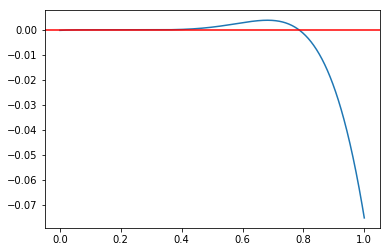

In [6]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

xs = np.linspace(0,1,1000)

plt.plot(xs,f(xs))
plt.axhline(0,c='r')

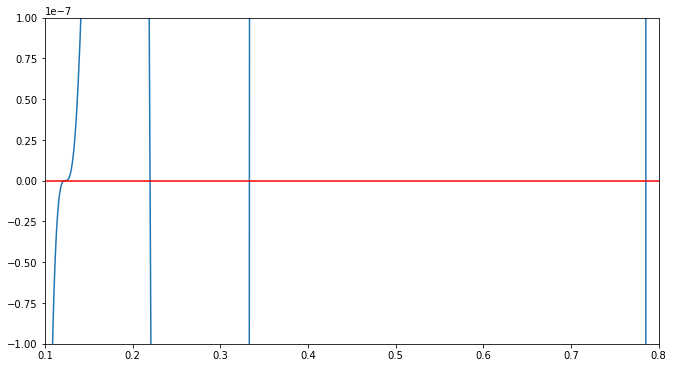

In [7]:

plt.figure(figsize=(11,6))
plt.plot(xs,f(xs))
plt.ylim(-1e-7,1e-7)
plt.xlim(0.1,0.8)
plt.axhline(0,c='r')

[0.11249999999999999, 0.21000000000000002, 0.333125, 0.785411376953125]


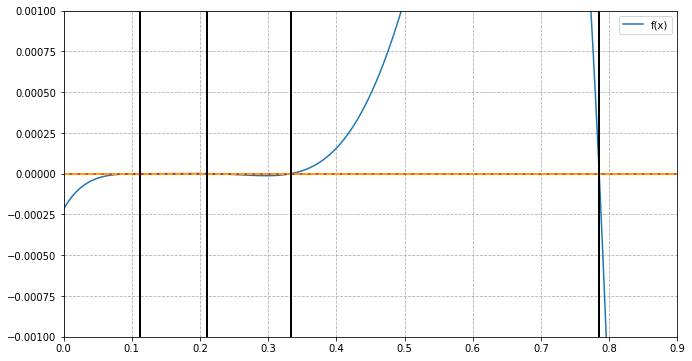

In [8]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7
    
def bisection(f,tol,l,r):
    left = l
    right= r
    mid = (left+right)/2.0
    while( abs(f(mid)) > tol):
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        mid = (left + right)/2.0
    return mid
x1 = bisection(f,1e-6,0,0.15)
x2 = bisection(f,1e-6,0.15,.23)
x3 = bisection(f,1e-6,0.23,0.34)
x4 = bisection(f,1e-6,0.34,1)

ans = [x1,x2,x3,x4]
print(ans)

plt.figure(figsize=(11,6))
plt.plot(xs,f(xs),label='f(x)')
plt.legend()
plt.grid(ls="--")
plt.axhline(0,c='r')
plt.xlim(0,0.9)
plt.ylim(-1e-3,1e-3)
plt.axhline(1e-6,c='orange',ls='--')
plt.axhline(-1e-6,c='orange',ls='--')

for i in ans:
    plt.axvline(i,c='black',lw='2')

2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

In [9]:
xs = np.linspace(0,1,1000)

def dfx(x):
    return 0.0072868 - 2*(0.0977383)*x + 3*0.664685*(x**2) -\
            4*(2.40773)*(x**3) + 5*4.46766*(x**4) - 6*3.7091*(x**5)\
            + 7*(x**6)
        
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

def bisection(f,tol,l,r):
    left = l
    right= r
    mid = (left+right)/2.0
    while( abs(f(mid)) > tol):
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        mid = (left + right)/2.0
    return mid

x1 = bisection(dfx,1e-7,0,0.2)
x2 = bisection(dfx,1e-7,0.21,0.4)
x3 = bisection(dfx,1e-7,0.41,0.8)

x = [x1,x2,x3]
y = [f(x) for x in x]
print(x)
print(y)

plt.figure(figsize=(10,7))
plt.plot(xs,f(xs))
plt.grid(ls='--')
plt.xlim(0,0.8)
plt.ylim(-1e-6,4e-3)
for i in range(3):
#     plt.annotate('x%.2f'%x[i], xy=(x[i], 0), xytext=(x[i],-0.2), fontsize=8)
    plt.axvline(i,c='g')
plt.axhline(0,c='r',ls='--') 
plt.scatter(x,y,lw='10',c='orange')

[0.191357421875, 0.297091064453125, 0.6817803573608401]
[1.369076070699871e-06, -1.214713659800483e-05, 0.003825808321969118]


2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

((0.6817803573608401, 0.003825808321969118), (1, -0.07515324699999937))
0 -0.000216747
1 -0.07515324699999937


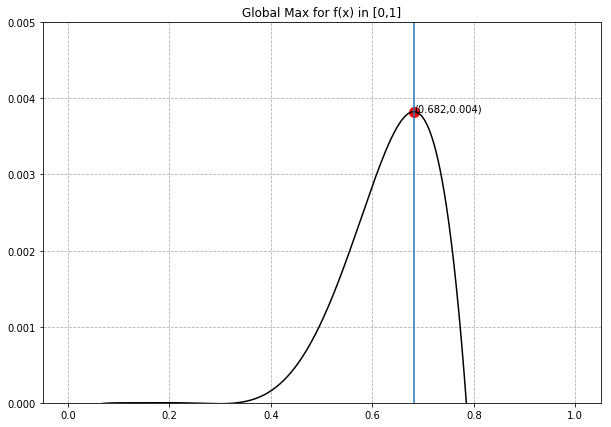

In [10]:
   
xs = np.linspace(0,1,1000)
        
    
def dfx(x):
    return 0.0072868 - 2*(0.0977383)*x + 3*0.664685*(x**2) -\
            4*(2.40773)*(x**3) + 5*4.46766*(x**4) - 6*3.7091*(x**5)\
            + 7*(x**6)

def bisection(f,tol,l,r):
    left = l
    right= r
    mid = (left+right)/2.0
    while( abs(f(mid)) > tol):
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        mid = (left + right)/2.0
    return mid

def findMax(p1,p2):
    if(p1[1] > p2[1]): return p1
    else: return p2
    
def findMin(p1,p2):
    if(p1[1] < p2[1]): return p1
    else: return p2

x1 = bisection(dfx,1e-7,0,0.2)
x2 = bisection(dfx,1e-7,0.21,0.4)
x3 = bisection(dfx,1e-7,0.41,0.8)

x = [x1,x2,x3,0,1]
y = [f(x) for x in x]



def findGlobal(x):
    gMax = (x[0],f(x[0]))
    gMin = (x[0],f(x[0]))
    for x_i in x:
        point = (x_i,f(x_i))
        
        gMax = findMax(gMax,point)
        gMin = findMin(gMin,point)
    return (gMax,gMin)

allGlobal = findGlobal(x)
gMin = allGlobal[1]
gMax = allGlobal[0]

plt.figure(1,figsize=(10,7))
plt.plot(xs,f(xs),c='black',label='f(x)')
plt.grid(ls='--')
plt.legend()
plt.xlim(-0.5,1.5)
plt.axhline(0,c='r',ls='--') 
plt.title("Global Min for f(x) in [0,1]")
plt.axvline(allGlobal[1][0])
plt.scatter(gMin[0],gMin[1],c='r',lw='5')
plt.annotate("(%.3f,%.3f)"%(gMin[0],gMin[1]),xy=(gMin[0],gMin[1]), xytext=(gMin[0],gMin[1]))

plt.figure(2,figsize=(10,7))
plt.title("Global Max for f(x) in [0,1]")
plt.plot(xs,f(xs),c='black')
plt.ylim(0,0.005)
plt.grid(ls='--')
plt.axvline(allGlobal[0][0])
plt.scatter(gMax[0],gMax[1],c='r',lw='5')
plt.annotate("(%.3f,%.3f)" %(gMax[0],gMax[1]),xy=(gMax[0],gMax[1]),xytext=(gMax[0],gMax[1]))

print(allGlobal)
print(0,f(0))
print(1,f(1))

3) In quantum physics, when finding a bound state for a finite potential well one would end up with the following equation(Yes E is negative):

$$
\sqrt{\frac{-E}{E+V_0}} = \tan \sqrt{2m \frac{E+V_0}{\hbar^2} a}
$$

The goal is to find all Energy($E$) that satisfy this equation.
For simplicity, let
- $V_0 = 1$
- $m = 1$
- $a = 1$
- $\hbar = 1$(Yes this is called natural unit)

$$
    \sqrt{\frac{-E}{E+1}} = \tan \sqrt{2(E+1)}
$$

Find the value for $E\in (-1.0, 0)$ which satisfy the equation above). Make sure you accuracy is $<\pm10^{-4}$


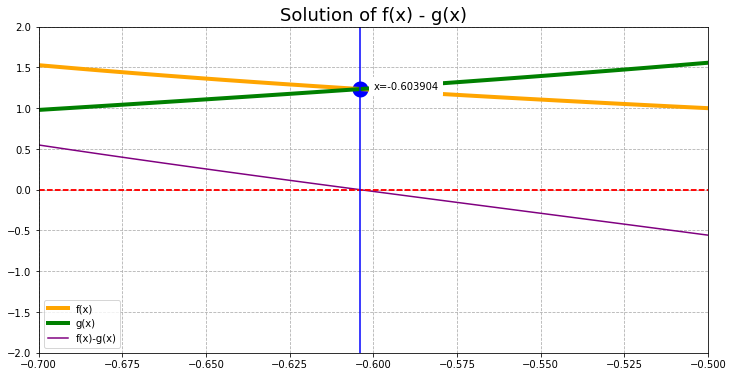

In [11]:
def f(x):
        return math.sqrt(-x/(x+1))
def g(x):
    return math.tan(math.sqrt(2*(x + 1)))
    
def h(x):
    return f(x) - g(x)

def bisection(f,tol,l,r):
    left = l
    right= r
    mid = (left+right)/2.0
    while( abs(f(mid)) > tol):
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        mid = (left + right)/2.0
    return mid

xs = np.linspace(-0.999,-0.1, 100)
fx = [f(x) for x in xs]
gx = [g(x) for x in xs]
hx = [h(x) for x in xs]

ans = bisection(h,1e-4,-0.999,-0.1)

plt.figure(1,figsize=(12,6))
plt.plot(xs,fx,c='orange',label='f(x)',lw='4')
plt.plot(xs,gx,c='green',label='g(x)',lw='4')
plt.plot(xs,hx,c='purple',label='f(x)-g(x)')
plt.legend()
plt.grid(ls='--')
plt.axhline(0,c='r',ls='--')
plt.xlim(-0.7,-0.5)
plt.ylim(-2,2)
plt.axhline(0,c='r',ls='--')
plt.title("Solution of f(x) - g(x)",fontsize=18)
# plt.xlim(-0.65,-0.55)
# plt.ylim(-0.3,0.25)
plt.axvline(ans,c='b')
plt.scatter(ans,f(ans),lw='10',c='b')
plt.annotate('x=%.6f'%ans, xy=(ans, 0), xytext=(-0.6,f(ans)), fontsize=10,backgroundcolor='w')
plt.grid(ls='--')

plt.legend()

4) Ply quit programming and decide to be a Apple(fruit) shop owner. He bought 1000 apples everyday and try to sell it. The probability $k$ customer want Ply's apple(one each) is given by Poisson distribution:

$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Where $\lambda$ is an parameter that represent the mean of number of people that want Ply's apple each day.

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

The goal for this problem is to figure out how he should change the number of apples he bought in a day.

- In case you are curious https://en.wikipedia.org/wiki/Poisson_distribution. The true distribution of this selling apple process should be binomial distribution but with large enough customer and low enough probability of an individual buying an apple 

4.1) You may find that if you try to code poisson distribution directly. It will not work with large number.
$$
    P(k; \lambda) = \frac{\lambda^k \exp(-\lambda)}{k!}
$$

Explain briefly why python complains

In [12]:
import math
def bad_poisson(lmd, k):
    return pow(lmd,k)*math.exp(-lmd)/math.factorial(k)
#bad_poisson(1000,1000) # uncomment to see it breaks

#overload

4.2) A very useful trick to avoid this problem is to take log and exponentiate. That is

$$
    P(k; \lambda) = \exp\left( \ln \left[ \frac{\lambda^k \exp(-\lambda)}{k!} \right] \right)
$$

First, show that
$$
    \ln(P(k; \lambda)) = (\ldots \ln(\ldots)-\ldots)-\ln(k!)
$$



Answer :
$$ 
\ln(P(k;\lambda)) = (k \cdot \ln(\lambda) - \lambda) - \ln(k!)
$$

4.3) $\ln(k!)$ shows up everywhere in math. So most math library have `lgamma` function to compute this very fast.
For example,

`math.lgamma(n) == math.log(math.factorial(n-1))`

Your job for this problem is to implement $P(k; \lambda)$ using log-exp trick.

If you do it right, $P(k=1000; \mu=1000) \approx 0.0126146$

In [13]:
def poisson(lmd, k):
    return math.exp((k*math.log(lmd) - lmd) - math.lgamma(k+1))

print(poisson(1000,1000))

0.012614611348719664


4.4) Now here is the fun part. Suppose that $\lambda = 987.6$(this is not true). Find the probability that Ply will sell all his 1000 apples. (Remember if 2000 people want Ply's apple, he his apple will also be sold out). 

And No, summing up to infinity is not practical.

In [14]:
fx = sum([poisson(987.6,i) for i in range(1000)])
print(1- fx)

0.3507846581670552


4.5) Recall the information that

After selling apples for 2000 days Ply found that his 1000 apples a day are sold out 600 days out of 2000 days.

Find the value for $\lambda$ to a decent accuracy($<\pm 0.1$)

In [38]:
def poisson(lmd, k):
    return math.exp((k*math.log(lmd) - lmd) - math.lgamma(k+1))

def sumProb(lmd):
    return sum([poisson(lmd,k) for k in range(1000)])

def f(lmd):
    return 1-(600/2000)-sumProb(lmd)

def bisection(f,tol,l,r):
    left = l
    right= r
    mid = (left+right)/2.0
    while( abs(f(mid)) > tol):
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        mid = (left + right)/2.0
    return mid

lmd = bisection(f,1e-6,0.9,1000)
print(lmd)

983.1785097599031


4.6) Using $\lambda$ you found in 4.5).

Ply bounght apple for 20 Baht each and he sell it for 50 Baht each. Which means that for each apple he sells he make a profit of 30 baht. But, at the end of each day Ply has to trash all unsold Apples(taking a loss of 20 Baht each).

If Ply bought 1000 apples a day, what would be his expected profit(remember expected value from discrete math/stat/quantum?).

In [16]:
lmd = 983.1785097599031
def poisson(lmd, k):
    return math.exp((k*math.log(lmd) - lmd) - math.lgamma(k+1))

# x = number of apples Ply bought per day
# def ExpectedProfit(x):
#     prob = [poisson(lmd,k) for k in range(int(x))]
#     return (30*x) - (20*sum(prob))

def expectedProfit(x):
    count = 0
    for i in range(x):
        # i = sold
        count += (30*i - 20*(x-i))*poisson(lmd,i)
    count += 30*x*(1-sum([poisson(lmd,i) for i in range(x)]))
    return count

expectedProfit(1000)

28864.608346843306

4.7) Using $\lambda$ you found in 4.5) Find the number of apple Ply should buy in a day to maximize his expected profit.

991.836734694


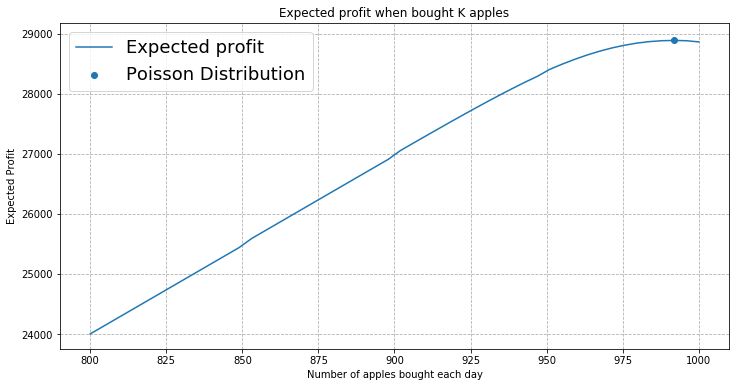

In [17]:
xs = np.linspace(800,1000)
# fx = [poisson(lmd,x) for x in xs]
expected = [expectedProfit(int(x)) for x in xs]

soln = xs[expected.index(max(expected))]

plt.figure(2,figsize=(12,6))
plt.plot(xs,expected,label="Expected profit")
plt.title("Expected profit when bought K apples")
plt.scatter(soln,expectedProfit(int(soln)),label="Poisson Distribution")
plt.xlabel("Number of apples bought each day")
plt.ylabel("Expected Profit")
plt.grid(ls='--')
plt.legend(fontsize=18)

print(soln)

5) Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a the distribution is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

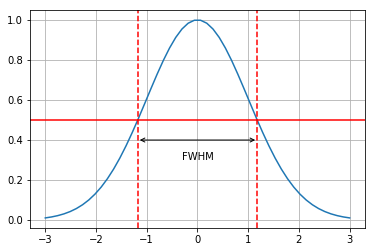

In [18]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

5.1) Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

$$
x= \sqrt{\frac{g}{y} -g^2} + mu
$$

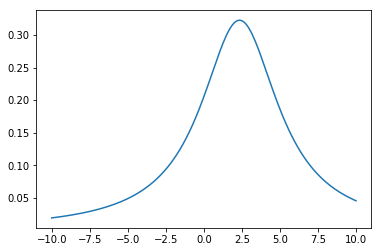

In [34]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)

xs = np.linspace(-10,10,200)
ys = [f(x) for x in xs]
plt.plot(xs,ys)

In [42]:
def dfx(x,gamma=3.1):
    mu = 2.345
    return -(gamma*2*(x-mu))/(((x-mu)**2+gamma**2)**2)

def find_x(a,b,e,g=3.1):
    x = (a+b)/2
    if(np.abs(dfx(x,g)) < e):
        return x
    else:
        if(dfx(x,g) * dfx(a,g) < 0):
            return find_x(a,x,e,g)
        else:
            return find_x(x,b,e,g)
        
m_x = find_x(0,5.,1e-4)
m_y = f(m_x)
mid_y = m_y/2
# print("Mid y , Max y")
# print(mid_y,m_y)

def f2(x, gamma=3.1,y = mid_y):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2) - y

def find2_x(a,b,err,g,mid_y):
    x = (a+b)/2
    if(np.abs(f2(x,g,mid_y)) < err):
        return x
    else:
        if(f2(x,g,mid_y)*f2(a,g,mid_y) < 0):
            return find2_x(a,x,err,g,mid_y)
        else:
            return find2_x(x,b,err,g,mid_y)
        
x1 = find2_x(-10,m_x,1e-4,3.1,mid_y)
x2 = find2_x(m_x,10,1e-4,3.1,mid_y)
# print("X1 X2")
# print(x1,x2)
# print("FW")
# print(x2-x1)

RecursionError: maximum recursion depth exceeded

In [ ]:
def FWHM(a,b,err,g=3.1):
    
    m_x = find_x(a,b,err,g)
    m_y = f(m_x,g)
    mid_y = m_y/2
    x1 = find2_x(-10,m_x,1e-4,g,mid_y)
    x2 = find2_x(m_x,10,1e-4,g,mid_y)
    return (x1,x2)

x1,x2 = FWHM(-10,10.,1e-4)
print(x1,x2,x2-x1)

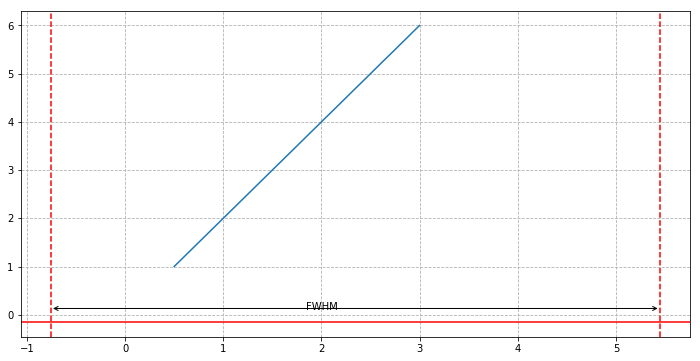

In [41]:
xs = np.linspace(-10,10,200)
ys = [f(xx) for xx in x]
plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.grid(ls='--')
plt.axvline(x1,c='r',ls='--')
plt.axvline(x2,c='r',ls='--')
plt.axhline(mid_y,c='r')
plt.annotate(
    '', xy=(x1, 0.13), xycoords='data',
    xytext=(x2, 0.13), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(2,0.10,'FWHM',horizontalalignment ='center')

5.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

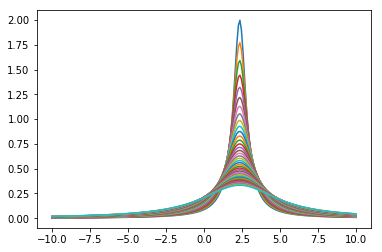

In [23]:
gs = np.linspace(0.5,3,40)

for g in gs:
    xs = np.linspace(-10,10,200)
    ys = [f(x,g) for x in xs]
    plt.plot(xs,ys)

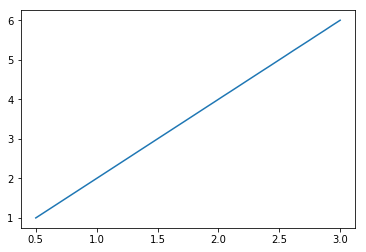

In [24]:
x = []
y = []
for g in gs:
    x1,x2 = FWHM(-10.0,10.0,1e-4,g)
    x.append(g)
    y.append(x2-x1)
plt.plot(x,y)

5.3) (Optional) Prove the relation you found in 5.2)

FWHM = 2 $\gamma$